## Automating the Enjambment Test of Orality in Milton’s Paradise Lost et al.

Albert B. Lord's *The Singer of Tales* proposes three tests by which a text can be determined to be "oral" in nature, rather than primarily literary (130). The "enjambment test"—largely based on the work of Milman Parry examining the effects that enjambment have on syntax in verse—states that enjambment which breaks up syntax more violently is found almost exclusively in written verse forms. Parry refers to this form of enjambment as "necessary" (203). In this form, "the verse end can fall at the end of a word group where there is not yet a whole thought, or it can fall in the middle of a word group" (Parry 203). Other writers such as Rainer Friedrich break this down further into three distinct forms, each with varying degrees of sense interruption based on the syntactical unit broken up.

Opposed to the violent interruption of necessary enjambment is the form which Parry refers to as "unperiodic", referring to the classical idea of syntactical units as "periods" put forth by Denis of Halicarnassus (201). Later critics refer to this instead as "adding" enjambment, which I will as well. Parry defines this as a verse which "can end with a word group in such a way that the sentence, at the verse end, already gives a complete thought, although it goes on in the next verse, adding free ideas by new word groups" (203). Because this form is most closely associated with oral versemaking, it is the one that I have chosen to focus on in Milton.

In the introduction added to later editions of *Paradise Lost*, Milton wrote that he wished to eschew rhyming in order to create "true musical delight; which consists onely in apt Numbers, fit quantity of Syllables, and the sense variously drawn out from one Verse into another" (Milton pg. 291). Parry, in fact, uses this quote as the epigraph to his essay. Though Milton was unaware of the critical frameworks that would be applied to the device which we now call enjambment, he was surely aware of the effects of varying types of syntactical interruption across verse end on a listener or reader.

Initially, I wished to create a program which could categorize different forms of enjambment by the four types proposed by Rainer Friedrich in which adding enjambment is one form and necessary enjambment breaks down into three subcategories. This allows one to weigh the two in contrast to each other in a text, leading to the revelation, for instance, that Homer uses adding and necessary enjambment in close to equal proportion, or that *The Aeneid* uses more than four times the amount of necessary enjambment than adding. These proportions give a sense of which texts are more "literary" than "oral" in a way which is intuitive. Most would agree that Virgil's style is more "literary" than Homer's fine mixture of singing phrases and complicated syntax. 

However, I came to the conclusion that searching only for adding enjambment can by itself give a sense of the writer's awareness of orality. Rather than search for the weighted proportion of "oral" to "literary" syntax, one can search only for the "oral" if one is looking across a corpus of work, such as sections of *Paradise Lost* or across, say, English epics. My hypothesis is that Milton, aware of the effects of syntactical interruption on sense, will imbue the dialogue of *Paradise Lost* with more adding enjambment, giving it a more flowing form in order to better capture the effects of speech.

In [1]:
import pandas as pd
import requests
import spacy
import os

In [2]:
nlp = spacy.load('en_core_web_lg')

In [4]:
def findJams(text):
    if '\\n' in text:
        lines = text.split('\\n')
    elif '\n' in text:
        lines = text.split('\n')
    enjambs = []
    for i, line in enumerate(lines):
        if i == len(lines) - 1:
            break
        punct = ').,:;!?-–—\'\"'
        lineOne = lines[i]
        lineTwo = lines[i+1]
        if lineOne != '' and lineTwo != '':
            if lineOne[-1] not in punct:
                enjambs.append([nlp(lineOne), nlp(lineTwo)])
    return enjambs

In [5]:
def findAddingFreq(text):
    numberAdding = 0
    addingList = []
    for item in findJams(text):
        if item[1][0].pos_ == "ADJ" and item[1][1].pos_ != "NOUN" and item[1][1].pos_ != "VERB":
            numberAdding += 1
            #addingList.append(item)
        elif item[1][0].pos_ == "ADV" and item[1][1].pos_ != "NOUN" and item[1][1].pos_ != "VERB":
            numberAdding += 1
            #addingList.append(item)
    if '\\n' in text:
        return numberAdding / len(text.split('\\n'))
    if '\n' in text:
        return numberAdding / len(text.split('\n'))

In order to search for adding enjambment specifically, I first broke up the text by line, then searched for lines which did not end in a punctuation mark, thinking that syntax is always broken up by a form of punctuation. Enjambment can occur across punctuation when a list is broken up across verse end, such as in the following:

If chance the radiant sun with farewell sweet
Extend his ev'ning beam, the fields revive,
The birds their notes renew, and bleating herds 
Attest their joy, that hill and valley rings. (II. 492-495)

Each of these lines is enjambed although the second line ends in a comma. There, the list is a whole syntactical unit which is separated across verse end. Because this form of enjambment with punctuation is not relevant to my search for adding enjambment, I elected not to include it. Further, it makes up an exceedingly minor proportion of lines.

Having pulled enjambed lines out of the text, the code then uses SpaCy's POS tagger to find the second lines in enjambed line pairs which begin with an adjective or adverb that modifies something from the line before it, which simply adds meaning to the previous line. Using SpaCy just for its POS tagger is odd because of how notoriously slow SpaCy is; however, if the program is going to be expanded to categorize all types of enjambment, then I will need to use SpaCy's dependency parsing function to determine if the second line of an enjambed pair contains information necessary to the understanding of the first line, such as a direct object broken away from its verb.

Having accomplished this, I used the sets of individual character's dialogue extraced from the text by Jonathan Reeve in his essay "A Macro-Etymological Analysis of Milton’s *Paradise Lost*" in order to determine if "spoken" sections of *Paradise Lost* had a more oral quality than the text as a whole.

In [6]:
response = requests.get('http://corpus-db.org/api/id/26.0/fulltext')
paradise = response.text
p = paradise[paradise.find('Book I') : -27]

abdiel = open('sp/Abdiel.txt').read()
adam = open('sp/Adam.txt').read()
adamEve = open('sp/AdamEve.txt').read()
bubz = open('sp/Beelzebub.txt').read()
belial = open('sp/Belial.txt').read()
chaos = open('sp/Chaos.txt').read()
death = open('sp/Death.txt').read()
eve = open('sp/Eve.txt').read()
gabriel = open('sp/Gabriel.txt').read()
god = open('sp/God.txt').read()
ithuriel = open('sp/Ithuriel.txt').read()
mammon = open('sp/Mammon.txt').read()
michael = open('sp/Michael.txt').read()
moloch = open('sp/Moloch.txt').read()
nisroc = open('sp/Nisroc.txt').read()
noah = open('sp/Noah.txt').read()
raphael = open('sp/Raphael.txt').read()
satan = open('sp/Satan.txt').read()
serpent = open('sp/SatanSerpent.txt').read()
sin = open('sp/Sin.txt').read()
son = open('sp/theSon.txt').read()
uriel = open('sp/Uriel.txt').read()
voice = open('sp/VoiceofTheApocalypse.txt').read()
zephon = open('sp/Zephon.txt').read()
zophiel = open('sp/Zophiel.txt').read()
charDict = {"Abdiel": str(abdiel), "Adam": str(adam), "Adam and Eve": str(adamEve), "Beelzebub": str(bubz), 
            "Belial": str(belial), "Chaos": str(chaos), "Death": str(death), "Eve": str(eve), "Gabriel": str(gabriel), 
            "God": str(god), "Ithuriel": str(ithuriel), "Mammon": str(mammon), "Michael": michael, "Moloch": moloch, 
            "Nisroc": nisroc, "Noah": noah, "Raphael": raphael, "Satan": satan, 
            "Satan as Serpent": serpent, "Sin": sin, "The Son": son, "Uriel": uriel,
            "Voice of the Apocalypse": voice, "Zephon": zephon, "Zophiel": zophiel}
blank = ''
charactersString = blank.join(charDict.values())
csCleaned = charactersString.replace('\n               ', '\\n')
csCleaned = csCleaned.replace('\n              ', '\\n')
csCleaned = csCleaned.replace('\n            ', '\\n')
csCleaned = csCleaned.replace('   ', '')

for title, text in charDict.items():
    charDict[title] = text.replace('\n               ', '\\n')
    charDict[title] = text.replace('\n              ', '\\n')
    charDict[title] = text.replace('\n            ', '\\n')
    charDict[title] = text.replace('   ', '')

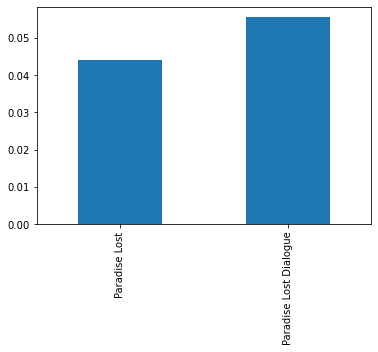

In [7]:
paradiseComparison = {"Paradise Lost": p, "Paradise Lost Dialogue": csCleaned}
compDict = {"Adding Enjambement Frequency":{title:findAddingFreq(text) for title, text in paradiseComparison.items()}}
compDf = pd.DataFrame(compDict)
compDf['Adding Enjambement Frequency'].plot(kind="bar")

The test showed that in dialogue, about 5.3% of the lines use adding enjambment, compared to about 4.3% in the text as a whole: about a 20% difference. This confirms that Milton's style in character's speech has a marked difference in syntactical interruption. Where can we take this further? 

Having already created a corpus of individual character's speech, I ran this program across it to see which characters utilize a more flowing, adding style.

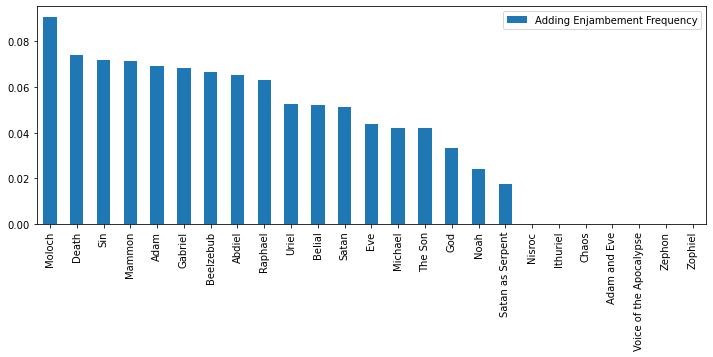

In [8]:
charDataDict = {"Adding Enjambement Frequency":{title:findAddingFreq(text) for title, text in charDict.items()}}
charDataDf = pd.DataFrame(charDataDict)
charDataDf.sort_values('Adding Enjambement Frequency', ascending=False).plot(kind="bar", figsize=(12,4))

In [9]:
print(len(adam.split('\n')), len(raphael.split('\n')))

1384 1301


All of the characters that do not utilize adding enjambment all have less than five lines each: an issue of space rather than style.

After this, the most interesting to me are God's relatively low use of it (less even than the text as a whole), and Moloch and Mammon's incredibly high use of it. The following section is typical of God's speech patterns:

`
The rest shall hear me call, and oft be warn'd
Their sinful state, and to appease betimes
The incensed Deity, while offer'd grace
Invites; for I will clear their senses dark,
What may suffice, and soften stony hearts
To pray, repent, and bring obedience due.
To prayer, repentance, and obedience due. . . (III.185-191)
`

As seen in the above passage, God's speeches are marked by caesura and necessary enjambment, creating a syntax which folds back on itself in a maze of recursive self-reference. Note that each enjambed line is followed by an object phrase or a subject broken from its verb. Note also that each line shows at least a soft caesura, culminating in the hard caesura after "Invites;". Note finally the tranformation of verbs to nouns in the final two lines as a means of doubling back on the investigation of actions in their abstract and in their realized states.

God does not care much whether he convinces anyone of anything. Throughout the text we see that characters from angels to Adam must simply listen to what he says and form their own opinions of it. God tests and the way he speaks reflects this. Moloch and Mammon on the other hand speak in order to try to convince others. They are rhetoricians as on the Parliament floor.

The following is typical of Moloch's attempts at persuasion: "no, let us rather choose / Armed with Hell flames and fury all at once" (*Paradise* II. 60-61). Moloch emphasizes to the other demons first their own agency, then tacks onto it a rousing image of their fury, like equipping armor onto the body.

From my analysis, it's apparent that Milton uses syntactical interruption as a rhetorical device, himself hyper aware of the speech patterns of politicians who would try to gloss over issues in order to persuade like the demons here shown, rather than give all of the information up front in their complicated whole and let the listener decide, as God does.

Length, again, of a text or section is an issue here. Sections that are longer give more meaningful results. This is why God's are more useful, and why a comparison of God to someone like Raphael is perhaps more salient than to the demons Moloch and Mammon. Raphael vies with Adam for the most lines in the entire work, coming in at 1,301 lines of speech to Adam's 1,384. Though Raphael is almost neatly in the middle of the pack here, his speech is markedly more imbued with "adding" enjambment than, say, *Paradise Lost* on the whole. Milton goes as far as to mark for the reader that Raphael is trusted as one of Heaven's most affable when he tells us that Raphael is known in Heaven as "the sociable Spirit" (*Paradise* V.221) To me, this marks Raphael as being particularly loquacious, given to easy, and flowing speech. He is the one best-suited to the diplomatic task of speaking to Adam. In this way, Raphael is quite similar to Moloch and Mammon. He is a skilled orator who uses the shape of his speech to inform his rhetoric and to do the work of persuasion for him subtly.

In [10]:
response = requests.get('http://corpus-db.org/api/id/2428.0/fulltext')
pope = response.text
pope = pope[pope.find('Awake, my St.') : pope.find('\\n\\n\\nARGUMENT OF EPISTLE II.')]

response = requests.get('http://corpus-db.org/api/id/19.0/fulltext')
hiawatha = response.text
hiawatha = hiawatha[hiawatha.find('Introduction\\n\\nShould') : 
                    hiawatha.find('\\n\\n\\n\\n\\n                    VOCABULARY')]

response = requests.get('http://corpus-db.org/api/id/1322.0/fulltext')
whitman = response.text
whitman = whitman[whitman.find('BOOK III\\n'): whitman.find('\\n\\n\\n\\n\\nBOOK IV.')]
whitman = whitman.replace('\\n  ', '\\n')
whitman = whitman.replace('\\n     ', '\\n')
whitman = whitman.replace('\\n    ', '\\n')

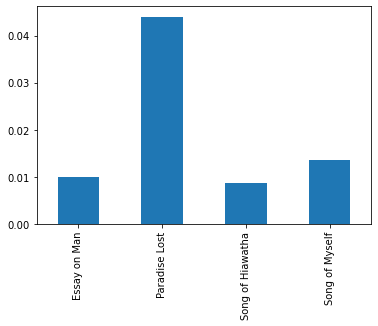

In [11]:
textsDict = {"Paradise Lost":p, "Essay on Man":pope, "Song of Hiawatha":hiawatha, 
             "Song of Myself":whitman}
dataDict = {"Adding Enjambement Frequency":{title:findAddingFreq(text) for title, text in textsDict.items()}}
dataDf = pd.DataFrame(dataDict)
dataDf['Adding Enjambement Frequency'].plot(kind="bar")

Moving past Milton, is it possible to see adding enjambment across other similar texts in order to get a sense of their "oral" versus "literary" quality? I ran the same code on Longfellow's *Song of Hiawatha* and Whitman's "Song of Myself"; both used significantly less adding enjambment. This indicates to me less about the "oral" versus "literary" sense of the works as it does merely about their use of syntax. Whitman's free verse is typified by his long lines. Because the lines are so long, it is much easier for him to fit syntactically whole units into them. As for Longfellow, his enjambment is typified by the necessary style: when he breaks up a unit, he does so often directly between the subject and verb of a sentence as in the following enjambment between the second and third lines: "And the Spirit, stooping earthward,/ With his finger on the meadow / Traced a winding pathway for it," (Longfellow I).

Though these poems can both be simply called "epics" in a vein similar to *Paradise Lost*, they are metrically wildly different. Whitman's free verse and Longfellow's trochaic tetrameter are far flung from Milton's iambic pentameter. Thus, I believe that using this program to determine a sense of "orality" is best done across works which have defined metrical forms, such as sonnets. Otherwise, it is only useful in bringing our attention to the way in which the author utilizes enjambment in a general, grammatical sense.

## Works Cited

Friedrich, Rainer. “Homeric Enjambement and Orality.” *Hermes*, vol. 128, no. 1, 2000, pp. 1–19. *JSTOR*, www.jstor.org/stable/4477342. Accessed 11 Dec. 2020.

Longfellow, Henry Wadsworth. *The Song of Hiawatha*. Maine Historical Society, https://www.hwlongfellow.org/poems_poem.php?pid=63. Accessed 11 Dec. 2020.

Lord, Albert B. *The Singer of Tales.* Forge Village, Mass., Harvard University Press, 1960. Print.

Milton, John. *The Complete Poetry and Essential Prose of John Milton.* Edited by William Kerrigan et al., Modern Library, 2007. 

Parry, Milman. “The Distinctive Character of Enjambement in Homeric Verse.” *Transactions and Proceedings of the American Philological Association*, vol. 60, 1929, pp. 200–220. JSTOR, www.jstor.org/stable/282817. Accessed 11 Dec. 2020.

Reeve, Jonathan. "A Macro-Etymological Analysis of Milton’s Paradise Lost." *GitHub*, https://github.com/JonathanReeve/milton-analysis